## Residencia + Gerador distribuído + Armazenador

- Considere a instalação de um sistema de armazenamento de energia elétrica na residência. 

- A energia elétrica pode ser armazenada em dois casos:
    1. Quando a energia de fontes renováveis está sobrando no sistema, ou seja, quando a geração a partir de fontes renováveis é maior que a demanda.
    2. Quando o custo da compra de energia da rede é mais barato.

- A energia armazenada poder ser consumida posteriormente:
    1. Quando a demanda é alta.
    2. Quando o custo da compra de energía da rede é maior.
    3. Quando a geração a partir de fontes renováveis não está disponível.

![Residencia](../Figuras/3.3.png)


Note que: 

|$e_{t}^{AE} = 1$ (Injeção (Descarrega))| $e_{t}^{AE} = 0$ (Extração (Carrega))|
|:----:|:----:|
|$ 0 \leq P_{t}^{AEi} \leq \overline{P}^{AE}$ | $P_{t}^{AEi} = 0 $ |
|$P_{t}^{AEe} = 0 $| $ 0 \leq P_{t}^{AEe} \leq \overline{P}^{AE}$ |

- Implemente o modelo de PLIM proposto.

## Formulação General

### Conjuntos
- $ T: \text{Conjunto de intervalos de tempo.}$

### Parâmetros

- $ P_{t}^{D} : \text{Demanda de potência ativa da residencia no intervalo t [kW].} $
- $ P_{t}^{GD} : \text{Geração distribuída da residencia no intervalo t [kW].} $
- $ c_{t} : \text{Custo pela compra de energia no intervalo t [R\$kWh].} $
- $ \overline{P}^{AE} : \text{Potência ativa máxima de injeção e extração do armazenador [kW].} $
- $ \overline{E}^{AE} : \text{Capacidade máxima de armazenamento [kWh].} $
- $ \overline{E}^{AE0} : \text{Energia armazenada inicial [kWh].} $
- $ \alpha : \text{Eficiencia do armazenador}$
- $ \delta: \text{Intervalo de tempo em horas[h]}$

### Variáveis de decisão

- $P_{t}^{S} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{V} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{AEi} : \text{Potencia ativa de injeção do armazenador no intervalo t.}$
- $P_{t}^{AEe} : \text{Potencia ativa de extração do armazenador no intervalo t.}$
- $E_{t}^{AE} : \text{Energia armazenada no intervalo t}$
- $e_{t}^{AE} : \text{Estado de operação do armazenador no intervalo t.}$

### Função objetivo 

- $ \mathrm{Min} : \text{Custo total} = \delta \sum\limits_{t \in T} c_{t}  P_{t}^{S}$

### Restrições 

- $ P_{t}^{S} + P_{t}^{GD} - P_{t}^{V} = P_{t}^{D} + P_{t}^{AEe} - P_{t}^{AEi} \;\;\;\;\;\; \forall t \in T $
- $E_{t}^{AE} =  E_{t-1}^{AE} + \alpha\delta P_{t}^{AEe} - \delta P_{t}^{AEi}/\alpha  \;\;\;\;\;\; \forall t \in T /t > 1 $
- $E_{t}^{AE} =  E^{AE0} + \alpha\delta P_{t}^{AEe} - \delta P_{t}^{AEi}/\alpha  \;\;\;\;\;\; \forall t \in T /t = 1 $
- $0 \leq P_{t}^{AEi} \leq \overline{P}^{AE} e_{t}^{AE}\;\;\;\;\;\; ;\forall t \in T$
- $0 \leq P_{t}^{AEi} \leq \overline{P}^{AE} (1 - e_{t}^{AE}) \;\;\;\;\;\; ;\forall t \in T$
- $0 \leq E_{t}^{AEe} \leq \overline{E}^{AE}  \;\;\;\;\;\; ;\forall t \in T $

- $ P_{t}^{S}, P_{t}^{V} \geq 0 \;\;\;\;\;\; ;\forall t \in T $
- $ e_{t}^{AE} \in {0,1} \;\;\;\;\;\; ;\forall t \in T$




## Preparaçõ dos dados de entrada

### Conjuntos
- $ T: \text{Conjunto de intervalos de tempo.}$

In [1]:
tempo = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

### Parâmetros

- $ P_{t}^{D} : \text{Demanda de potência ativa da residencia no intervalo t [kW].} $
- $ P_{t}^{GD} : \text{Geração distribuída da residencia no intervalo t [kW].} $
- $ c_{t} : \text{Custo pela compra de energia no intervalo t [R\$kWh].} $
- $ \overline{P}^{AE} : \text{Potência ativa máxima de injeção e extração do armazenador [kW].} $
- $ \overline{E}^{AE} : \text{Capacidade máxima de armazenamento [kWh].} $
- $ \overline{E}^{AE0} : \text{Energia armazenada inicial [kWh].} $
- $ \alpha : \text{Eficiencia do armazenador}$
- $ \delta: \text{Intervalo de tempo em horas[h]}$

In [2]:
dem = {'1': 1.9317, '2': 1.609, '3': 1.4079, '4': 1.3281, '5': 1.3834, '6': 1.6413, '7': 1.9395, '8': 1.7383, '9': 1.8341, '10': 1.8354, '11': 1.9312, '12': 2.3645, '13': 2.2038, '14': 2.2997, '15': 2.1659, '16': 2.5046, '17': 2.749, '18': 4.0597, '19': 4.9924, '20': 5.4257, '21': 5.0491, '22': 4.4294, '23': 3.7692, '24': 2.7716}
GD = {'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0796, '6': 0.4565, '7': 1.0742, '8': 1.579, '9': 2.4343, '10': 2.7488, '11': 3.5092, '12': 3.8988, '13': 3.9734, '14': 3.7105, '15': 3.1671, '16': 2.7282, '17': 2.3926, '18': 2.1764, '19': 1.9083, '20': 1.4257, '21': 0.0034, '22': 0.0, '23': 0.0, '24': 0.0}
costs = {'1': 0.22419,'2': 0.22419,'3': 0.22419,'4': 0.22419,'5': 0.22419,'6': 0.22419,'7': 0.22419,'8': 0.22419,'9': 0.22419,'10': 0.22419,'11': 0.22419,'12': 0.22419,'13': 0.22419,'14': 0.22419,'15': 0.22419,'16': 0.22419,'17': 0.32629,'18': 0.51792,'19': 0.51792,'20': 0.51792,'21': 0.32629,'22': 0.22419,'23': 0.22419,'24': 0.22419}
P_max_AE = [2]
E_max_AE = [7]
E_ini_AE = [0]
alpha = [0.90]
delta = [1] 


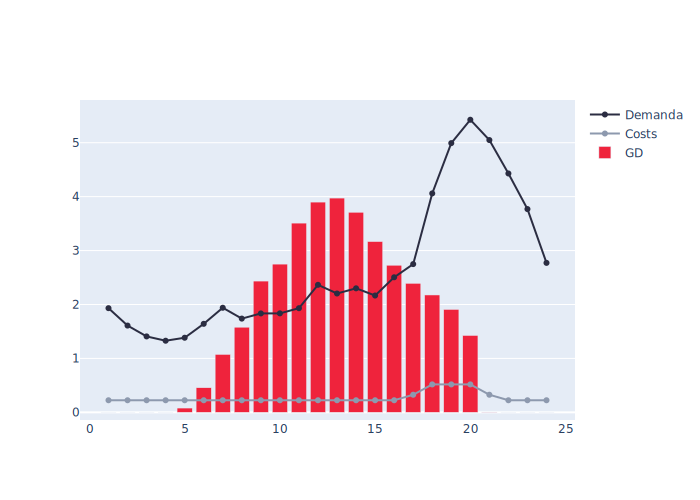

In [3]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name='Demanda', x = tempo, y=list(dem.values()), mode="markers+lines", marker=dict(color='#2B2D42')))
fig.add_trace(go.Scatter(name='Costs', x = tempo, y=list(costs.values()), mode="markers+lines", marker=dict(color='#8d99ae')))
fig.add_trace(go.Bar(name='GD', x = tempo, y=list(GD.values()), marker=dict(color='#EF233C')))
fig.update_layout(hovermode="x unified")
fig.show('svg')

## Modelo computacional PYOMO

In [4]:
from pyomo.environ import *
model = ConcreteModel("Residencia 03")

### Variáveis de decisão

- $P_{t}^{S} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{V} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{AEi} : \text{Potencia ativa de injeção do armazenador no intervalo t.}$
- $P_{t}^{AEe} : \text{Potencia ativa de extração do armazenador no intervalo t.}$
- $E_{t}^{AE} : \text{Energia armazenada no intervalo t}$
- $e_{t}^{AE} : \text{Estado de operação do armazenador no intervalo t.}$

In [5]:
model.Ps = Var(tempo, within = PositiveReals)
model.Pv = Var(tempo, within = PositiveReals)
model.PAEi = Var(tempo, within = PositiveReals)
model.PAEe = Var(tempo, within = PositiveReals)
model.EAE = Var(tempo, within = PositiveReals)
model.eAE = Var(tempo, domain = Binary)

### Função objetivo 

- $ \mathrm{Min} : \text{Custo total} = \delta \sum\limits_{t \in T} c_{t}  P_{t}^{S}$

In [6]:
model.custo_total = Objective(expr= sum(model.Ps[t] * costs[str(t)] for t in tempo), sense=minimize)

### Restrições 

- $ P_{t}^{S} + P_{t}^{GD} - P_{t}^{V} = P_{t}^{D} + P_{t}^{AEe} - P_{t}^{AEi} \;\;\;\;\;\; \forall t \in T $
- $E_{t}^{AE} =  E_{t-1}^{AE} + \alpha\delta P_{t}^{AEe} - \delta P_{t}^{AEi}/\alpha  \;\;\;\;\;\; \forall t \in T /t > 1 $
- $E_{t}^{AE} =  E^{AE0} + \alpha\delta P_{t}^{AEe} - \delta P_{t}^{AEi}/\alpha  \;\;\;\;\;\; \forall t \in T /t = 1 $
- $0 \leq P_{t}^{AEi} \leq \overline{P}^{AE} e_{t}^{AE}\;\;\;\;\;\; ;\forall t \in T$
- $0 \leq P_{t}^{AEi} \leq \overline{P}^{AE} (1 - e_{t}^{AE}) \;\;\;\;\;\; ;\forall t \in T$
- $0 \leq E_{t}^{AEe} \leq \overline{E}^{AE}  \;\;\;\;\;\; ;\forall t \in T $

- $ P_{t}^{S}, P_{t}^{V} \geq 0 \;\;\;\;\;\; ;\forall t \in T $
- $ e_{t}^{AE} \in {0,1} \;\;\;\;\;\; ;\forall t \in T$

In [7]:
model.constraint_balanco = Constraint(tempo, rule=lambda model, t: 
    model.Ps[t] + GD[str(t)] - model.Pv[t] == dem[str(t)] + model.PAEe[t] - model.PAEi[t])

In [8]:
model.constraint_EA = Constraint(tempo[1:], rule=lambda model, t: 
    model.EAE[t] == model.EAE[t-1] + alpha[0] * delta[0] * model.PAEe[t] - delta[0] * model.PAEi[t] / alpha[0])

In [9]:

model.constraint_EAini = Constraint([tempo[0]], rule=lambda model, t: 
    model.EAE[t] == E_ini_AE[0] + alpha[0] * delta[0] * model.PAEe[t] - delta[0] * model.PAEi[t] / alpha[0])


In [10]:
model.constraint_pmaxi = Constraint(tempo, rule=lambda model, t: 
    model.PAEi[t] <= P_max_AE[0] * model.eAE[t])


In [11]:
model.constraint_pmaxe = Constraint(tempo, rule=lambda model, t: 
    model.PAEe[t] <= P_max_AE[0] * (1 - model.eAE[t]))

In [12]:
model.constraint_cmaxEA= Constraint(tempo, rule=lambda model, t: 
    model.EAE[t] <= E_max_AE[0])

### Solução

In [13]:
Resultado = SolverFactory('cbc', executable='C:/Solvers/cbc.exe').solve(model)

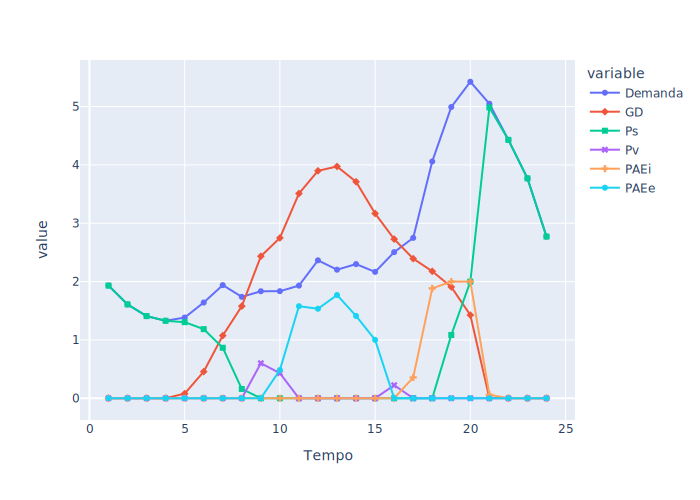

In [14]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'Tempo': tempo, 'Demanda': list(dem.values()), 'GD': list(GD.values()), 'Ps': [model.Ps[t]() for t in tempo], 'Pv': [model.Pv[t]() for t in tempo], 'PAEi': [model.PAEi[t]() for t in tempo], 'PAEe': [model.PAEe[t]() for t in tempo], 'EAE': [model.EAE[t]() for t in tempo]})
fig = px.line(df, x='Tempo', y=['Demanda', 'GD', 'Ps', 'Pv', 'PAEi', 'PAEe'] , symbol = 'variable')
fig.show('svg')

In [15]:
print(df)

    Tempo  Demanda      GD      Ps        Pv    PAEi      PAEe       EAE
0       1   1.9317  0.0000  1.9317  0.000000  0.0000  0.000000  0.000000
1       2   1.6090  0.0000  1.6090  0.000000  0.0000  0.000000  0.000000
2       3   1.4079  0.0000  1.4079  0.000000  0.0000  0.000000  0.000000
3       4   1.3281  0.0000  1.3281  0.000000  0.0000  0.000000  0.000000
4       5   1.3834  0.0796  1.3038  0.000000  0.0000  0.000000  0.000000
5       6   1.6413  0.4565  1.1848  0.000000  0.0000  0.000000  0.000000
6       7   1.9395  1.0742  0.8653  0.000000  0.0000  0.000000  0.000000
7       8   1.7383  1.5790  0.1593  0.000000  0.0000  0.000000  0.000000
8       9   1.8341  2.4343  0.0000  0.600200  0.0000  0.000000  0.000000
9      10   1.8354  2.7488  0.0000  0.429522  0.0000  0.483878  0.435490
10     11   1.9312  3.5092  0.0000  0.000000  0.0000  1.578000  1.855690
11     12   2.3645  3.8988  0.0000  0.000000  0.0000  1.534300  3.236560
12     13   2.2038  3.9734  0.0000  0.000000  0.000

In [16]:
model.custo_total.display()

custo_total : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 7.878210057000001
